In [6]:
import pandas as pd
path = 'csv_files/'

csvs = ['Jan2020','Feb2020','Mar2020','Apr2020','May2020','Jun2020',
       'Jul2020','Aug2020','Sep2020','Oct2020','Nov2020','Dec2020',
       'Jan2021','Feb2021','Mar2021','Apr2021','May2021','Jun2021',
       'Jul2021','Aug2021','Sep2021','Oct2021','Nov2021','Dec2021']
new_dict = {'login1' : {'wusers':[],'memory-used':[],'running-process':[],'cpu_usage %':[],'running-jobs':[]},
           'login2' : {'wusers':[],'memory-used':[],'running-process':[],'cpu_usage %':[],'running-jobs':[]},
           'login3' : {'wusers':[],'memory-used':[],'running-process':[],'cpu_usage %':[],'running-jobs':[]},
           'login4' : {'wusers':[],'memory-used':[],'running-process':[],'cpu_usage %':[],'running-jobs':[]},
           'login5' : {'wusers':[],'memory-used':[],'running-process':[],'cpu_usage %':[],'running-jobs':[]}
           }

for i in csvs:
    df  = pd.read_csv(path+i+'.csv',usecols=['date-hour','login-node','wusers','memory-used','running-process','cpu_usage %','running-jobs','df-usage'])
    new_df = df.sort_values(by=['login-node','date-hour'])
    month = new_df.iloc[-1][0][0:3]
    year = new_df.iloc[-1][0][5:10]
    end = int(new_df.iloc[-1][0][3:5])
    day_dict = {'login1' : {'wusers':[],'memory-used':[],'running-process':[],'cpu_usage %':[],'running-jobs':[]},
           'login2' : {'wusers':[],'memory-used':[],'running-process':[],'cpu_usage %':[],'running-jobs':[]},
           'login3' : {'wusers':[],'memory-used':[],'running-process':[],'cpu_usage %':[],'running-jobs':[]},
           'login4' : {'wusers':[],'memory-used':[],'running-process':[],'cpu_usage %':[],'running-jobs':[]},
           'login5' : {'wusers':[],'memory-used':[],'running-process':[],'cpu_usage %':[],'running-jobs':[]}}
    
    for j in range(1,end+1):
        if j <= 9:
            date = month+'0'+ str(j) + year
        else:
            date = month + str(j) + year
        
        abc = new_df[new_df['date-hour'].str.contains(date)]
        
        if abc.shape[0] != 0:
            
            for ii in range(1,6):
                tem_df = abc[abc['login-node'].str.contains('login'+str(ii))]
                
                if tem_df.shape[0] != 0: 
                    node = 'login'+ str(ii)
                    
                    day_dict[node]['wusers'].append(round(tem_df['wusers'].sum()/len(tem_df)))
                    day_dict[node]['memory-used'].append(round(tem_df['memory-used'].sum()/len(tem_df)))
                    day_dict[node]['running-process'].append(round(tem_df['running-process'].sum()/len(tem_df)))
                    day_dict[node]['cpu_usage %'].append(round(tem_df['cpu_usage %'].sum()/len(tem_df)))
                    day_dict[node]['running-jobs'].append(round(tem_df['running-jobs'].sum()/len(tem_df)))
        
    
    for j in range(1,6):
        new_dict['login'+str(j)]['wusers'].append(round(sum(day_dict['login'+str(j)]['wusers'])/len(day_dict['login'+str(j)]['wusers'])))
        new_dict['login'+str(j)]['memory-used'].append(round(sum(day_dict['login'+str(j)]['memory-used'])/ len(day_dict['login'+str(j)]['memory-used'])))
        new_dict['login'+str(j)]['running-process'].append(round(sum(day_dict['login'+str(j)]['running-process'])/len(day_dict['login'+str(j)]['running-process'])))
        new_dict['login'+str(j)]['cpu_usage %'].append(round(sum(day_dict['login'+str(j)]['cpu_usage %'])/len(day_dict['login'+str(j)]['cpu_usage %'])))
        new_dict['login'+str(j)]['running-jobs'].append(round(sum(day_dict['login'+str(j)]['running-jobs'])/len(day_dict['login'+str(j)]['running-jobs'])))
        

for j in range(1,6):
        new_dict['login'+str(j)]['wusers'] = round(sum(new_dict['login'+str(j)]['wusers'])/len(new_dict['login'+str(j)]['wusers']))
        new_dict['login'+str(j)]['memory-used'] = round(sum(new_dict['login'+str(j)]['memory-used'])/ len(new_dict['login'+str(j)]['memory-used']))
        new_dict['login'+str(j)]['running-process'] = round(sum(new_dict['login'+str(j)]['running-process'])/len(new_dict['login'+str(j)]['running-process']))
        new_dict['login'+str(j)]['cpu_usage %'] = round(sum(day_dict['login'+str(j)]['cpu_usage %'])/len(day_dict['login'+str(j)]['cpu_usage %']))
        new_dict['login'+str(j)]['running-jobs'] = round(sum(day_dict['login'+str(j)]['running-jobs'])/len(day_dict['login'+str(j)]['running-jobs']))
        

,login1,login2,login3,login4,login5
wusers,50,48,43,46,45
memory-used,417,420,418,425,422
running-process,493,555,451,523,433
cpu_usage %,97,122,110,76,86
running-jobs,71,71,71,70,71


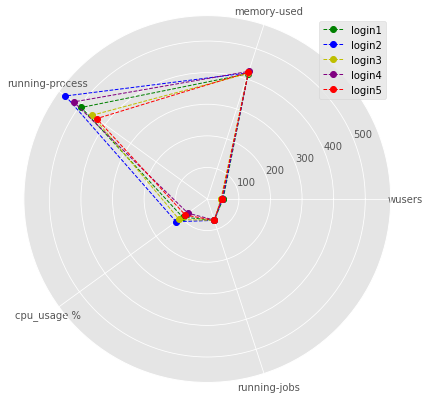

In [8]:
import matplotlib.pyplot as plt
import numpy as np
abc = pd.DataFrame(new_dict)
display(abc)

nodes =['wusers','memory-used','running-process','cpu_usage %','running-jobs']

login1 = abc['login1'].to_list()
login2 = abc['login2'].to_list()
login3 = abc['login3'].to_list()
login4 = abc['login4'].to_list()
login5 = abc['login5'].to_list()


angles = np.linspace(0,2*np.pi,len(nodes), endpoint=False)

angles = np.concatenate((angles,[angles[0]]))
login1.append(login1[0])
login2.append(login2[0])
login3.append(login3[0])
login4.append(login4[0])
login5.append(login5[0])


fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(polar=True)

ax.plot(angles,login1, 'o--', color='g', linewidth=1, label='login1')
#ax.fill(angles,login1, alpha=0.25, color='g')

ax.plot(angles,login2, 'o--', color='b', linewidth=1, label='login2')
#ax.fill(angles,login2, alpha=0.25, color='b')

ax.plot(angles,login3, 'o--', color='y', linewidth=1, label='login3')
#ax.fill(angles,login3, alpha=0.25, color='y')

ax.plot(angles,login4, 'o--', color='purple', linewidth=1, label='login4')
#ax.fill(angles,login4, alpha=0.25, color='purple')

ax.plot(angles,login5, 'o--', color='red', linewidth=1, label='login5')
#ax.fill(angles,login5, alpha=0.25, color='white')

ax.set_thetagrids(np.degrees(angles[:-1]), nodes)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()
